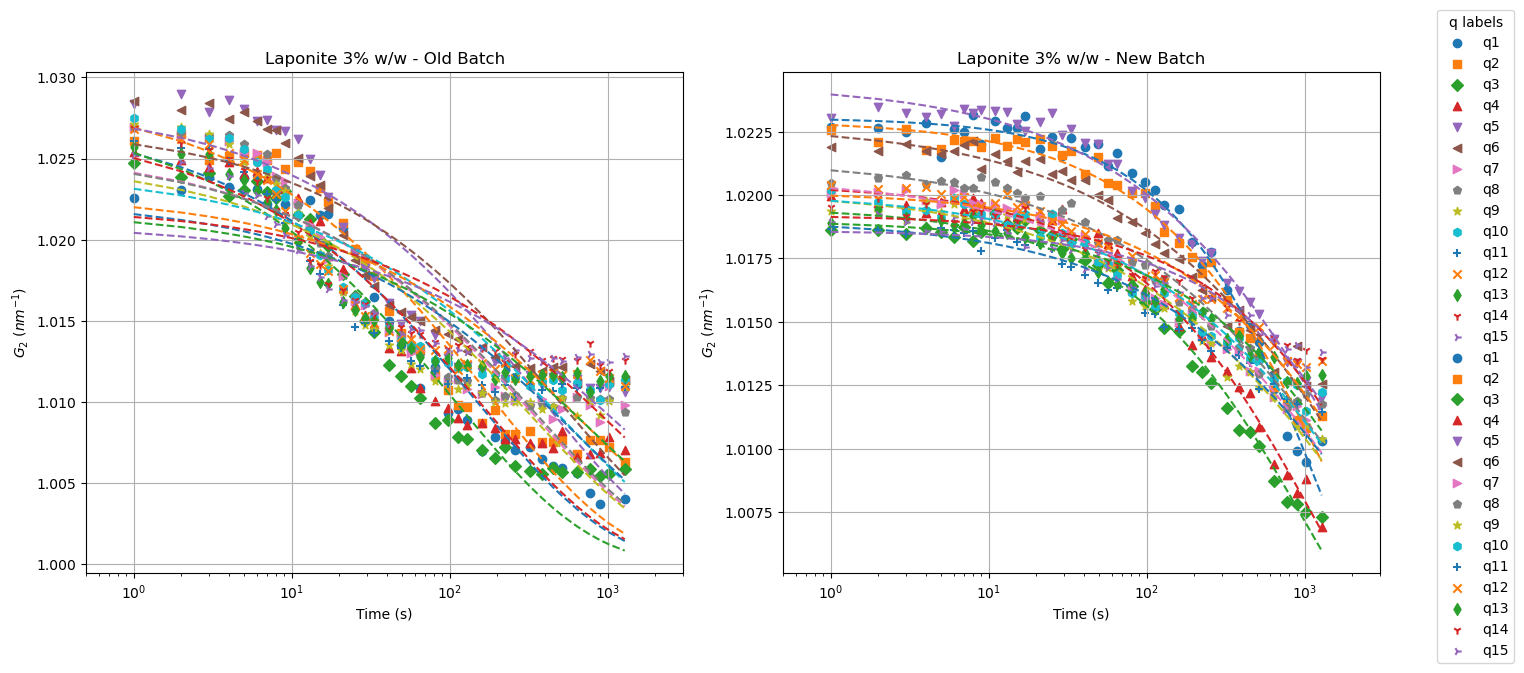

      q                         File         B            tq     gamma
0    q1  Laponite 3% w/w - Old Batch  0.027511    581.419826  0.500000
1    q2  Laponite 3% w/w - Old Batch  0.029051    677.929665  0.500000
2    q3  Laponite 3% w/w - Old Batch  0.027984    412.076424  0.500000
3    q4  Laponite 3% w/w - Old Batch  0.027128    617.951273  0.500000
4    q5  Laponite 3% w/w - Old Batch  0.028298   1455.592143  0.500000
5    q6  Laponite 3% w/w - Old Batch  0.027069   1999.832003  0.500000
6    q7  Laponite 3% w/w - Old Batch  0.025494   1314.232349  0.500000
7    q8  Laponite 3% w/w - Old Batch  0.025386   1382.528454  0.500000
8    q9  Laponite 3% w/w - Old Batch  0.024951   1298.543156  0.500000
9   q10  Laponite 3% w/w - Old Batch  0.024172   2093.207618  0.500000
10  q11  Laponite 3% w/w - Old Batch  0.022479   2377.974515  0.500000
11  q12  Laponite 3% w/w - Old Batch  0.022814   3034.581149  0.500000
12  q13  Laponite 3% w/w - Old Batch  0.021818   3342.540035  0.500000
13  q1

In [2]:
#G2 graphs for lap 3% - old and new - offset fixed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#KWW model 
def kww_model(x, B, tq, gamma):
    y0 = 1  #fixed parameter
    return y0 + B * np.exp(-2 * (x / tq) ** gamma)

def fit_kww_with_bounds(time, intensity):
    initial_guesses = [0.02, 120, 1.0]
    #bounds to constrain the fitting
    bounds = ([0, 1e-3, 0.5], [2, 1e4, 2.0])  
    try:
        popt, pcov = curve_fit(
            kww_model, time, intensity, p0=initial_guesses, bounds=bounds
        )
        return popt  
    except RuntimeError:
        return None  

file_names = [
    r'C:\Users\adria\Documents\LENS - PIBIC\PIBIC - 2024-2025\analysis\XPCS - Python analysis\XPCS_data\L3_B1\Auto-correlation lap3 B1',
    r'C:\Users\adria\Documents\LENS - PIBIC\PIBIC - 2024-2025\analysis\XPCS - Python analysis\XPCS_data\L3_B2\Auto-correlation lap3 B2',
]
titles = [
    "Laponite 3% w/w - Old Batch",
    "Laponite 3% w/w - New Batch"
]
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', '+', 'x', 'd', '1', '4']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

fit_results = []

for idx, (file_name, title) in enumerate(zip(file_names, titles)):
    data = pd.read_csv(file_name, sep=",")
    time = data['time']
    q_columns = [f'q{i}' for i in range(1, 16)]
    ax = axes[idx]

    for i, q_col in enumerate(q_columns):
        intensity = data[q_col]

        #fitting with bounds
        fit_params = fit_kww_with_bounds(time, intensity)
        if fit_params is not None:
            B, tq, gamma = fit_params
            fit_results.append({"q": q_col, "File": title, "B": B, "tq": tq, "gamma": gamma})

            ax.scatter(time, intensity, label=f'{q_col}', marker=markers[i % len(markers)])

            fitted_curve = kww_model(time, B, tq, gamma)
            ax.plot(time, fitted_curve, linestyle='--')

        else:
            fit_results.append({"q": q_col, "File": title, "B": None, "tq": None, "gamma": None})

    ax.set_xlabel("Time (s)")
    ax.set_xscale('log')
    ax.set_xlim(0.5, 3000)
    ax.set_ylabel("$G_{2}$ ($nm^{-1}$)")
    ax.set_title(title)
    ax.grid(True)

fig.legend(loc='center right', title="q labels", bbox_to_anchor=(1.09, 0.5))
plt.tight_layout()
plt.show()

fit_results_df = pd.DataFrame(fit_results)
print(fit_results_df)

fit_results_df.to_csv("kww_fit_results_lap3_fixed.csv", index=False)


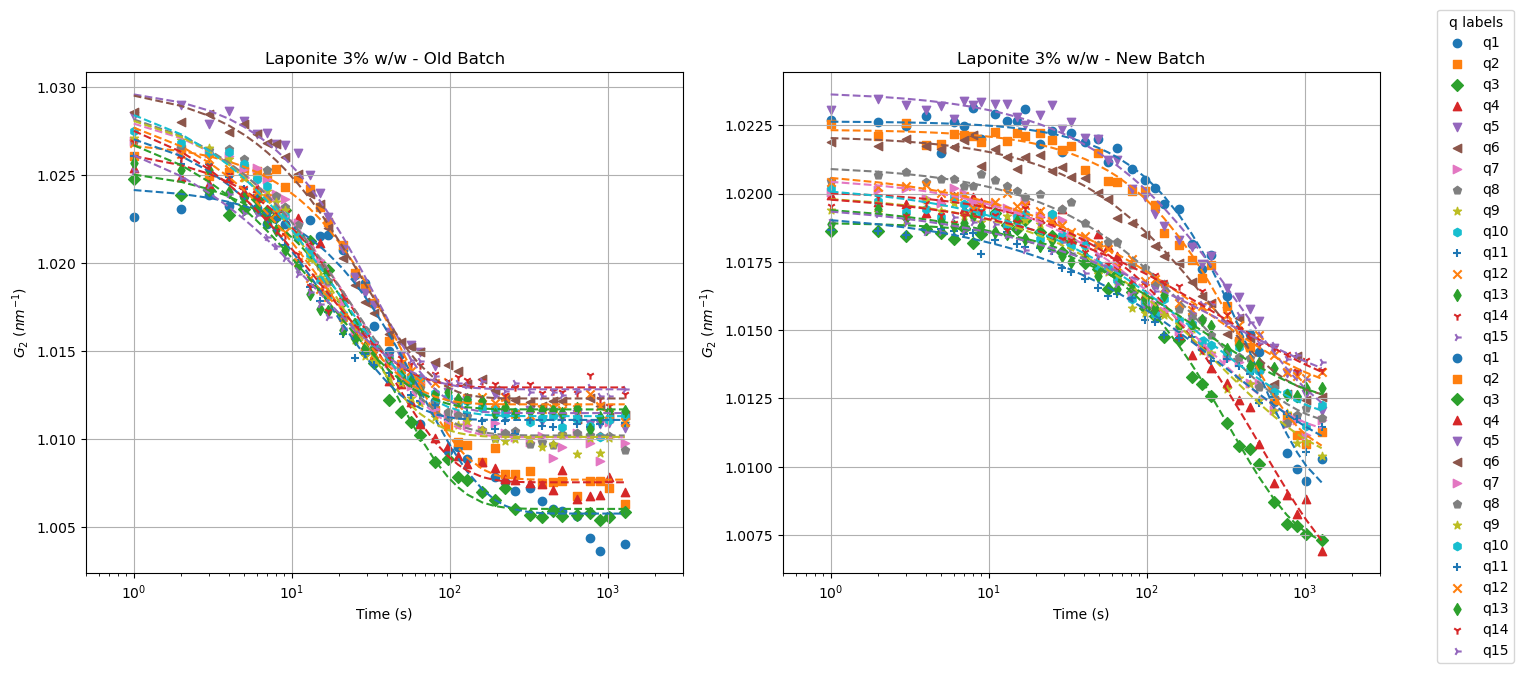

      q                         File    Offset         B           tq  \
0    q1  Laponite 3% w/w - Old Batch  1.005771  0.018564   126.109092   
1    q2  Laponite 3% w/w - Old Batch  1.007697  0.019194    97.235106   
2    q3  Laponite 3% w/w - Old Batch  1.006036  0.019391    82.561825   
3    q4  Laponite 3% w/w - Old Batch  1.007546  0.019067    75.979099   
4    q5  Laponite 3% w/w - Old Batch  1.011475  0.018509    62.830170   
5    q6  Laponite 3% w/w - Old Batch  1.012304  0.017799    58.081846   
6    q7  Laponite 3% w/w - Old Batch  1.010099  0.018852    58.272231   
7    q8  Laponite 3% w/w - Old Batch  1.010203  0.019212    58.615145   
8    q9  Laponite 3% w/w - Old Batch  1.010122  0.019014    47.397698   
9   q10  Laponite 3% w/w - Old Batch  1.011301  0.018671    47.604544   
10  q11  Laponite 3% w/w - Old Batch  1.011086  0.017062    38.516685   
11  q12  Laponite 3% w/w - Old Batch  1.011972  0.017139    39.550228   
12  q13  Laponite 3% w/w - Old Batch  1.011684  0.0

In [4]:
#G2 graphs for lap 3% - old and new - offset free

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#KWW model
def kww_model(x, y0, B, tq, gamma):
    return y0 + B * np.exp(-2 * (x / tq) ** gamma)

#bounds 
def fit_kww_with_bounds(time, intensity):
    initial_guesses = [1, 0.02, 120, 1.0]
    bounds = ([0.5, 0, 1e-3, 0.5], [2, 2, 1e4, 2.0])  
    try:
        popt, pcov = curve_fit(
            kww_model, time, intensity, p0=initial_guesses, 
        )
        return popt  
    except RuntimeError:
        return None  


file_names = [
    r'C:\Users\adria\Documents\LENS - PIBIC\PIBIC - 2024-2025\analysis\XPCS - Python analysis\XPCS_data\L3_B1\Auto-correlation lap3 B1',
    r'C:\Users\adria\Documents\LENS - PIBIC\PIBIC - 2024-2025\analysis\XPCS - Python analysis\XPCS_data\L3_B2\Auto-correlation lap3 B2',
]
titles = [
    "Laponite 3% w/w - Old Batch",
    "Laponite 3% w/w - New Batch"
]
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', '+', 'x', 'd', '1', '4']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fit_results = []

for idx, (file_name, title) in enumerate(zip(file_names, titles)):
    data = pd.read_csv(file_name, sep=",")
    time = data['time']
    q_columns = [f'q{i}' for i in range(1, 16)]
    ax = axes[idx]

    for i, q_col in enumerate(q_columns):
        intensity = data[q_col]

        #fitting with bounds
        fit_params = fit_kww_with_bounds(time, intensity)
        if fit_params is not None:
            y0, B, tq, gamma = fit_params
            fit_results.append({"q": q_col, "File": title, "Offset": y0, "B": B, "tq": tq, "gamma": gamma})

            ax.scatter(time, intensity, label=f'{q_col}', marker=markers[i % len(markers)])

            fitted_curve = kww_model(time, y0, B, tq, gamma)
            ax.plot(time, fitted_curve, linestyle='--')
        else:
            fit_results.append({"q": q_col, "File": title, "Offset": None, "B": None, "tq": None, "gamma": None})

    ax.set_xlabel("Time (s)")
    ax.set_xscale('log')
    ax.set_xlim(0.5, 3000)
    ax.set_ylabel("$G_{2}$ ($nm^{-1}$)")
    ax.set_title(title)
    ax.grid(True)

fig.legend(loc='center right', title="q labels", bbox_to_anchor=(1.09, 0.5))
plt.tight_layout()
plt.show()

fit_results_df = pd.DataFrame(fit_results)
print(fit_results_df)
fit_results_df.to_csv("kww_fit_results_lap3_free.csv", index=False)
